# Regression datasets

https://www.kaggle.com/code/heyrobin/house-price-prediction-beginner-s-notebook
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

with visual and text data:

https://github.com/emanhamed/Houses-dataset
https://www.kaggle.com/datasets/ted8080/house-prices-and-images-socal

# Classification datasets

https://www.kaggle.com/competitions/titanic

# Loading and exploring data 

At the beginning of each of your projects, you will start with loading and exploring your data. Sometimes, your data will come in one file, but more often you will have to combine multiple files. 
In addition, often you will have to clean and preprocess your data. We will take about this in more detail in the following notebooks. In this notebook, we will focus on tabular data. 

## Tabular data

Tabular data is data that is structured in a table. It is a collection of rows and columns. Each row represents an observation, and each column represents a variable for that observation. 
In this course, we will use several tabular datasets. One example is a dataset with house prices. Each row represents the data of one house, and each column represents a variable of that house. 
Each column represents a different aspect of the house, such as the number of bedrooms, the number of bathrooms, the size of the house, the location, etc. Another example, is the Titanic dataset. 
Each row represents a passenger on the Titanic, and each column represents a variable of that passenger, such as the passenger's class, the passenger's age, the passenger's sex, etc. 

## Loading data

In Python, tabular data is often loaded using the `pandas` library. `pandas` is a powerful library that provides a so-called DataFrame object for data manipulation and analysis. 
In the next sections, we will learn how to load data from a CSV file into a `pandas` DataFrame and use `pandas` to explore the data. We will start with the house prices dataset. 
The house prices dataset is a dataset from a [Kaggle data science competition](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques). It contains
the characteristics of a number of houses together with the sale prices of these houses.


In [1]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
import pandas as pd 

house_prices_df = pd.read_csv(os.path.join(data_directory,"house-prices/train.csv"), sep= ",", index_col= "Id")
house_prices_df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

The above code loads the house prices dataset from a CSV file into a `pandas` DataFrame. It specifies the separator between columns (in this case a comma) and sets the 'Id' column as the index column.
The index column is not a feature of the house, but it is a unique identifier for each row. We set it as the index column to make it easier to access the data. `pandas` provides a lot of `read_` functions,
each for different file formats. To see the full list of supported file formats, see the documentation provide [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

After we have read the data into a DataFrame, we can start exploring the data. For example, we can print the first five rows of the DataFrame using the `head()` method. We can also print the last five rows of the DataFrame using the `tail()` method.
By providing a number n to the `head()` and `tail()` methods, we can print the first and last n rows of the DataFrame, respectively. For instance:

In [3]:
house_prices_df.tail(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1451          90       RL         60.0     9000   Pave   NaN      Reg   
1452          20       RL         78.0     9262   Pave   NaN      Reg   
1453         180       RM         35.0     3675   Pave   NaN      Reg   
1454          20       RL         90.0    17217   Pave   NaN      Reg   
1455          20       FV         62.0     7500   Pave  Pave      Reg   
1456          60       RL         62.0     7917   Pave   NaN      Reg   
1457          20       RL         85.0    13175   Pave   NaN      Reg   
1458          70       RL         66.0     9042   Pave   NaN      Reg   
1459          20       RL         68.0     9717   Pave   NaN      Reg   
1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1451         Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
1452         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1453         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1454         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1455         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1456         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1457         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   
1458         Lvl    AllPub    Inside  ...        0    NaN  GdPrv        Shed   
1459         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
1460         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1451       0      9    2009        WD         Normal     136000  
1452       0      5    2009       New        Partial     287090  
1453       0      5    2006        WD         Normal     145000  
1454       0      7    2006        WD        Abnorml      84500  
1455       0     10    2009        WD         Normal     185000  
1456       0      8    2007        WD         Normal     175000  
1457       0      2    2010        WD         Normal     210000  
1458    2500      5    2010        WD         Normal     266500  
1459       0      4    2010        WD         Normal     142125  
1460       0      6    2008        WD         Normal     147500  

[10 rows x 80 columns]

This prints the last 10 rows of the DataFrame. 

## Accessing column and row data


To access a column of the DataFrame, we can use the column name as a key to access the column. For instance, to access the 'LotFrontage' column, we can use the following code:

In [4]:
house_prices_df['LotFrontage']

Id
1       65.0
2       80.0
3       68.0
4       60.0
5       84.0
        ... 
1456    62.0
1457    85.0
1458    66.0
1459    68.0
1460    75.0
Name: LotFrontage, Length: 1460, dtype: float64

To access a row of the DataFrame, we can use the index of the row. For instance, to access the row with index 5, we can use the following code:

In [5]:
house_prices_df.loc[5]

MSSubClass           60
MSZoning             RL
LotFrontage        84.0
LotArea           14260
Street             Pave
                  ...  
MoSold               12
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        250000
Name: 5, Length: 80, dtype: object

This is the last row in the cell above that printed the `head()` of the DataFrame. To access the last row in the DataFrame, we can both use a positive index and a negative index. For instance:

In [6]:
house_prices_df.loc[1460]

MSSubClass           20
MSZoning             RL
LotFrontage        75.0
LotArea            9937
Street             Pave
                  ...  
MoSold                6
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        147500
Name: 1460, Length: 80, dtype: object

This prints the last row in the DataFrame. We can also access the last row using a negative index, however we need to use the `iloc` accessor in this case. `iloc` accesses by using a integer index unrelated to the index column.

In [7]:
house_prices_df.iloc[-1]

MSSubClass           20
MSZoning             RL
LotFrontage        75.0
LotArea            9937
Street             Pave
                  ...  
MoSold                6
YrSold             2008
SaleType             WD
SaleCondition    Normal
SalePrice        147500
Name: 1460, Length: 80, dtype: object

## Exploring the data

Pandas also provides ways to explore the data in the dataframe. We can use the `describe()` method to get a summary of the numericaldata in the DataFrame. This method provides a summary of the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [8]:
house_prices_df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

Another way to explore the data is by using the `info()` method. This method provides a summary of the data types in the DataFrame.

In [9]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

The `info()` method above shows that the columns in the dataframe are of different data types. For example, the 'MSSubClass' column is of type `int64`, the 'Street' column is of type `object` (which is `pandas` way of saying that the column is of type string), and the 'SalePrice' column is of type `int64`. We also see how many non-null values there are in each column. This shows that the `Alley` column only has 91 non-null values. Since the dataset has 1460 rows, this means that a lot of the rows have no value. To see whether there are more missing values in the dataset, we can use the following code:

In [10]:
columns_indices_missing_values = house_prices_df.isna().any()
columns_with_missing_values = house_prices_df.columns[columns_indices_missing_values].tolist()
columns_with_missing_values

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

To show how many missing values there are in a specific column, we can use the following code:

In [11]:
number_of_missing_values = { column_name: house_prices_df[column_name].isna().sum() for column_name in columns_with_missing_values }
number_of_missing_values


{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

We can also show the missing values as a barplot:

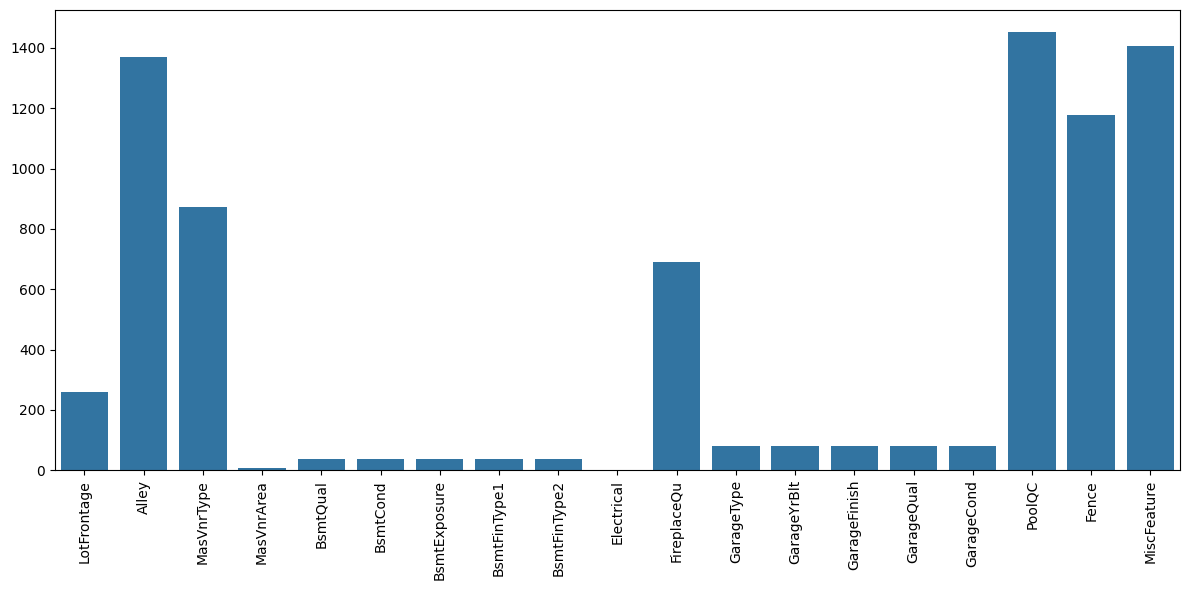

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.barplot(x=list(number_of_missing_values.keys()), y=list(number_of_missing_values.values()))
plt.xticks(rotation=90)
plt.tight_layout()

The barplot above shows that the columns with the most missing values are the 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', and 'MiscFeature' columns. We will have to deal with these missing values later in the course. 

## Column types

As we have seen above, the columns in the dataframe have different data types. Some column contain numerical features, such as the 'LotFrontage' column or the 'LotArea' column. Other columns contain categorical features, such as the 'Street' column or the 'Alley' column. Different column types need different types of analysis. For example, numerical columns can be analyzed using summary statistics, while categorical columns can be analyzed using frequency counts. Also, the column types differ in the way how they need to be handled when building machine learning models. Let's separate the column types:

In [ ]:
numerical_columns = house_prices_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
categorical_columns = house_prices_df.select_dtypes(include=['object']).columns.tolist()
categorical_columns


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

Check whether all columns were accounted for:

In [ ]:
len(numerical_columns) + len(categorical_columns) == house_prices_df.shape[1]

True

## Exploring numerical columns

When we look at numerical columns, we are often interested in the distribution of the data. To plot the distribution of one column, we can use a Python package called `seaborn`. Below, we plot the distribution of the 'SalePrice' column.
We both plot a histogram of the data as well as a kernel density estimate (KDE) plot. 

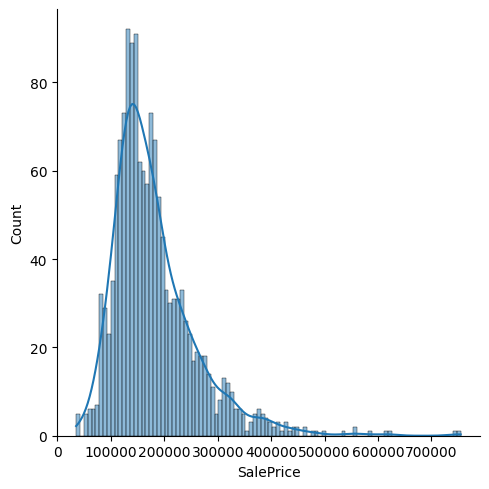

In [ ]:


sns.displot(house_prices_df['SalePrice'], bins=100, kde=True)

To plot the distribution of multiple numerical columns, we can use the pandas `hist()` method. This method creates a histogram for each numerical column. We can also set the number of bins, the size, and the font size of the labels.

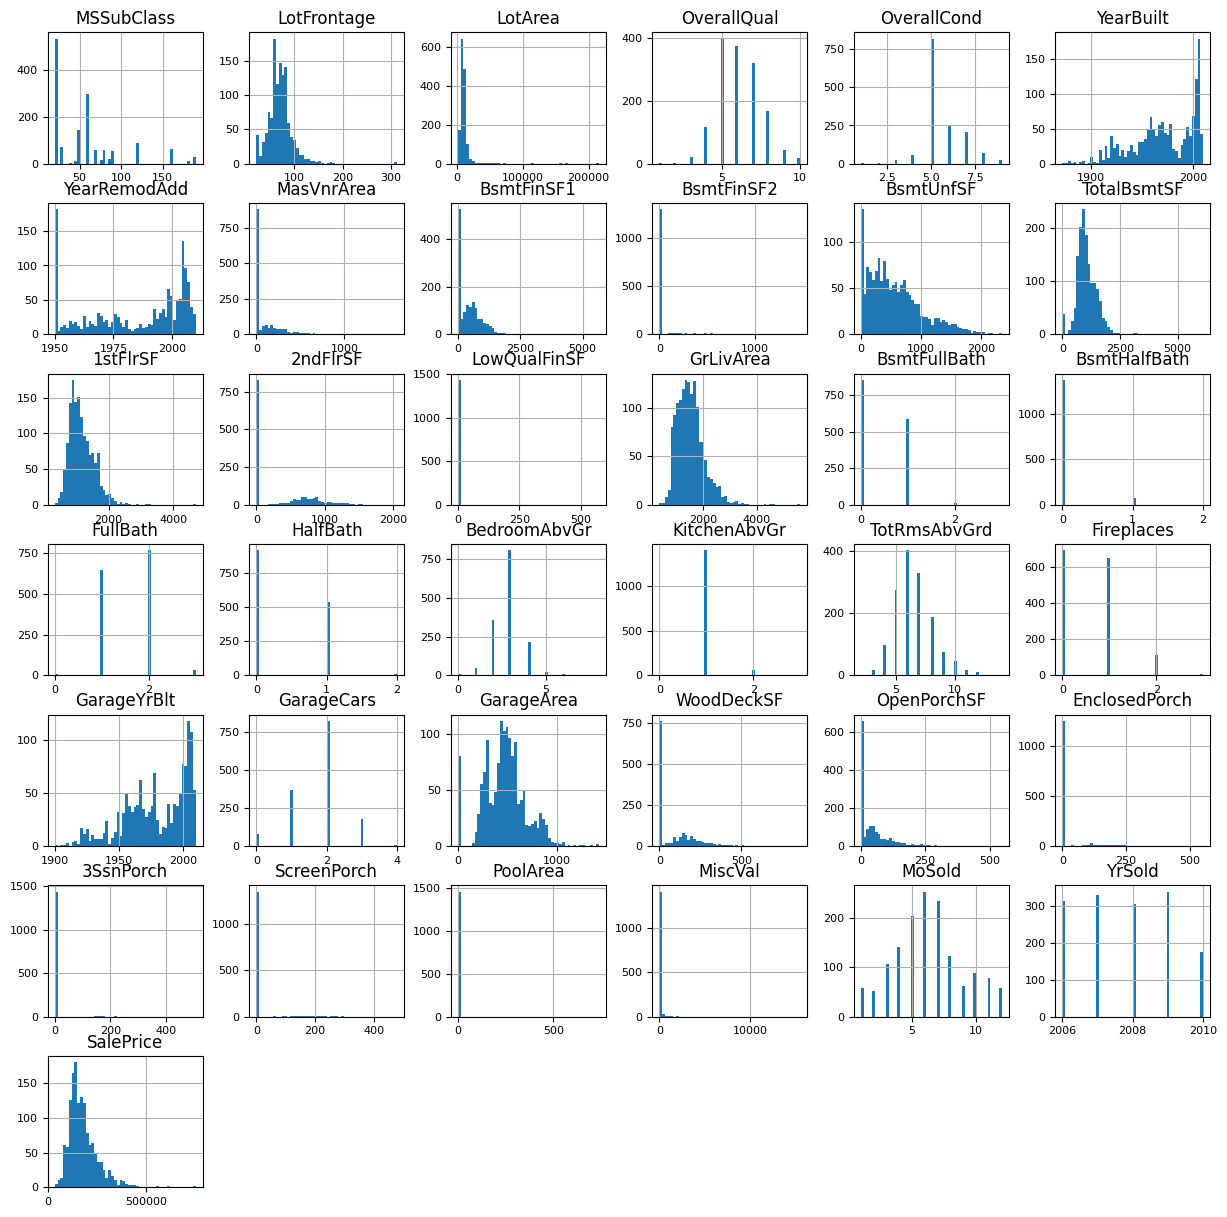

In [ ]:
house_prices_df[numerical_columns].hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8);


## Exploring categorical columns

To explore categorical columns, we can use the `value_counts()` method. This method provides a frequency count for each category in the column. For example, to get the frequency count for the 'Street' column, we can use the following code:

In [ ]:
house_prices_df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64


To plot the frequency count for a categorical column, we can use a bar plot. We can create such a bar plot using the `seaborn` package.


<Axes: xlabel='Street', ylabel='count'>

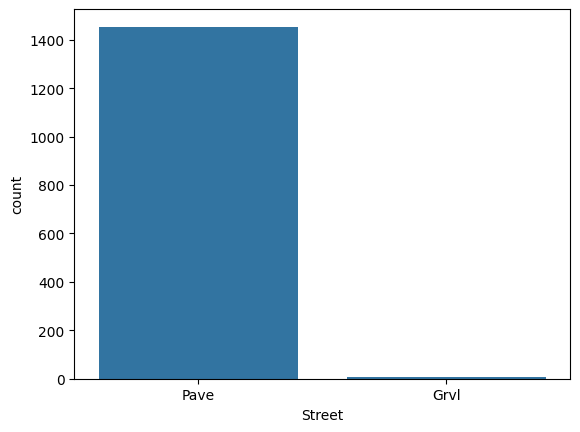

In [ ]:
sns.barplot(x='Street', y='count', data=house_prices_df['Street'].value_counts().reset_index())

# Summary 

In this notebook, we have learned:

- how to load data from a CSV file into a `pandas` DataFrame 
- how to show the first five rows using `head()` and the last five rows using `tail()`
- how to access the column data, using `df['column_name']`, and row data using `loc` and `iloc`
- separate the column types in numerical and categorical columns 
- how to plot the distribution of numerical columns. 

In the next notebook, we will learn how to clean and preprocess the data.